## Uniform in component masses prior

We want to reweight our likelihood samples on $\mathcal{M}_{\rm chirp}$ and $q$, which are uniform in the $\mathcal{M}_{\rm chirp}$-$q$ plane, to a distribution of $\mathcal{M}_{\rm chirp}$ and $q$, that is uniform in the $m_1$-$m_2$ plane. This means that the uniform prior on $\mathcal{M}_{\rm chirp}$ and $q$ needs to be reweighted by the determinant of the Jacobian of the transformation:
$$
|J| = \bigg| \frac{\partial(m1, m2)}{\partial(\mathcal{M}_{\rm chirp},q)} \bigg| = \mathcal{M}_{\rm chirp}q^{-6/5}(1+q)^{2/5}
$$,
since the prior probability needs to be uniform in $m_1$-$m_2$:
$$
\pi(\mathcal{M}_{\rm chirp},q) = \pi   \big[ m_1(\mathcal{M}_{\rm chirp},q), m_2(\mathcal{M}_{\rm chirp},q) \big] \bigg| \frac{\partial(m1, m2)}{\partial(\mathcal{M}_{\rm chirp},q)} \bigg|
$$

### Step-by-step derivation of the Jacobian

We need to express $m_1$ and $m_2$ as functions of $\mathcal{M}_{\rm chirp}$ and $q$:
$$
\begin{cases}
m_1 &= \frac{\mathcal{M}_{\rm chirp} (1+q)^{1/5}}{q^{3/5}}\\
m_2 &= \mathcal{M}_{\rm chirp}q^{2/5}(1+q)^{1/5}
\end{cases}
$$
Therefore, the Jacobian matrix is:
$$
J =
\begin{pmatrix}
\frac{\partial m_1}{\partial \mathcal{M}_{\rm chirp}} &\frac{\partial m_1}{\partial q}\\
\frac{\partial m_2}{\partial \mathcal{M}_{\rm chirp}} &\frac{\partial m_2}{\partial q}
\end{pmatrix} = 
\begin{pmatrix}
\frac{(1+q)^{1/5}}{q^{3/5}} &\frac{\mathcal{M}_{\rm chirp}}{5}(1+q)^{-4/5}q^{-8/5}(-3-2q)\\
q^{2/5}(1+q)^{1/5} &\frac{\mathcal{M}_{\rm chirp}}{5}(1+q)^{-4/5}q^{-3/5}(2+3q)
\end{pmatrix}
$$
The determinant of the Jacobian is then:
$$
|J| = \mathcal{M}_{\rm chirp}q^{-6/5}(1+q)^{2/5}
$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12)


matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = True

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

In [18]:
def from_mChirp_q_to_m1_m2(mChirp, q):
    """
    Compute the transformation from mChirp, q to m1, m2
    """
    m1 = mChirp * (1 + q)**(1/5) * q**(-3/5)
    m2 = mChirp * (1 + q)**(1/5) * q**(2/5)
    return m1, m2

In [ ]:
N = 100000 # number of samples

In [ ]:
# start with a uniform distribution in mChirp and q
mChirp = np.random.uniform(20, 30, N)
q = np.random.uniform(0.05, 0.99, N)

In [21]:
m1_before, m2_before = from_mChirp_q_to_m1_m2(mChirp, q)

In [22]:
mass_prior = (q**(-6/5)*mChirp*(1+q)**(2/5)) # jacobian from m1, m2 to mChirp, q

In [23]:
weights = mass_prior/mass_prior.sum()
index = np.random.choice(np.arange(N), size = N, replace = True, p = weights)
posteriors_mChirp = mChirp[index]
posteriors_q = q[index]

In [24]:
m1_after, m2_after = from_mChirp_q_to_m1_m2(posteriors_mChirp, posteriors_q)

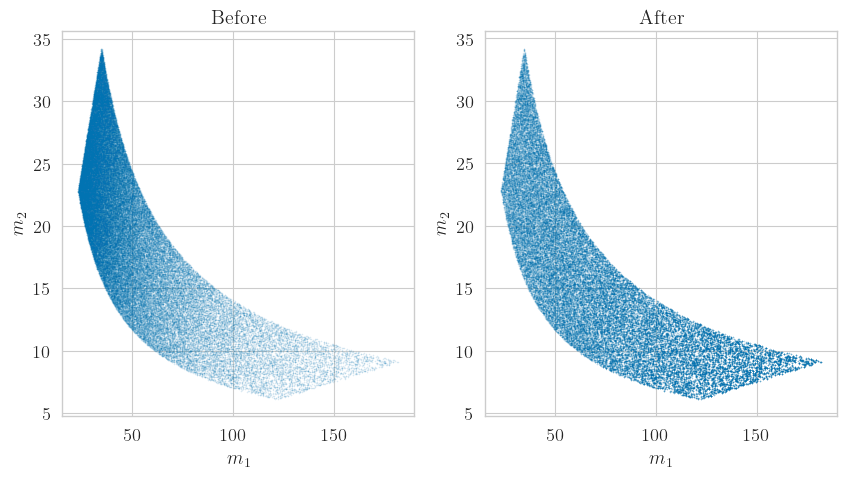

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(m1_before, m2_before, alpha=0.5, s=0.01, label='before')
ax[0].set_xlabel(r'$m_1$', fontsize=14)
ax[0].set_ylabel(r'$m_2$', fontsize=14)
ax[0].set_title('Before')

ax[1].scatter(m1_after, m2_after, alpha=0.5, s=0.01, label='after')
ax[1].set_xlabel(r'$m_1$', fontsize=14)
ax[1].set_ylabel(r'$m_2$', fontsize=14)
ax[1].set_title('After')

plt.show()

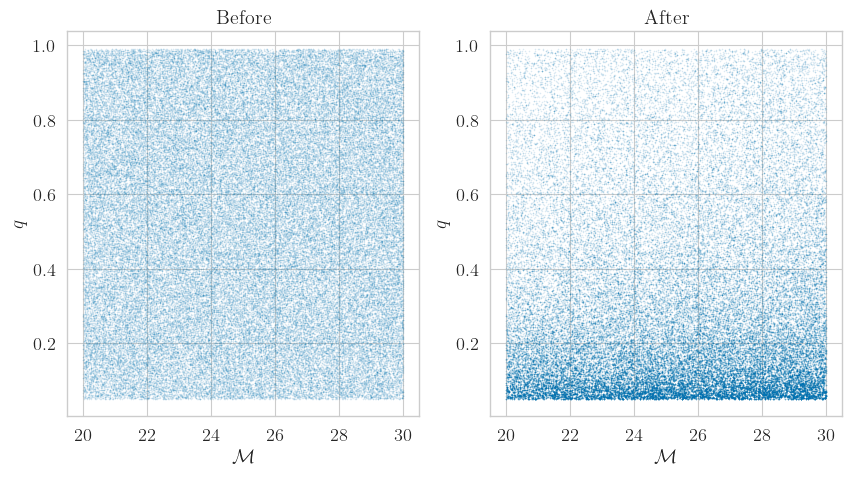

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(mChirp, q, alpha=0.5, s=0.01, label='before')
ax[0].set_xlabel(r'$\mathcal{M}$', fontsize=14)
ax[0].set_ylabel(r'$q$', fontsize=14)
ax[0].set_title(r'Before')

ax[1].scatter(posteriors_mChirp, posteriors_q, alpha=0.5, s=0.01, label='after')
ax[1].set_xlabel(r'$\mathcal{M}$', fontsize=14)
ax[1].set_ylabel(r'$q$', fontsize=14)
ax[1].set_title(r'After')

plt.show()